### Podstawowe statystyki i struktura danych

In [52]:
import pandas as pd

df = pd.read_csv("data/gym_members_exercise_tracking.csv")

df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [53]:
print("Struktura danych:")
df.dtypes

Struktura danych:


Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

Zbiór danych zawiera 15 zmiennych, w tym:

- 11 zmiennych numerycznych (int64 i float64) – opisujących cechy fizyczne, parametry treningowe i zdrowotne, np. Age, Weight (kg), BMI, Calories_Burned.

- 2 zmienne kategoryczne nominalne – Gender, Workout_Type.

- 1 zmienna porządkowa – Experience_Level (poziom doświadczenia treningowego, kodowany liczbowo).

- 1 zmienna obliczona – BMI, wyliczona na podstawie wagi i wzrostu.

In [54]:
print("\n Statystyki dla danych liczbowych:")
df.describe()


 Statystyki dla danych liczbowych:


Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

### Analiza zmiennych liczbowych

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

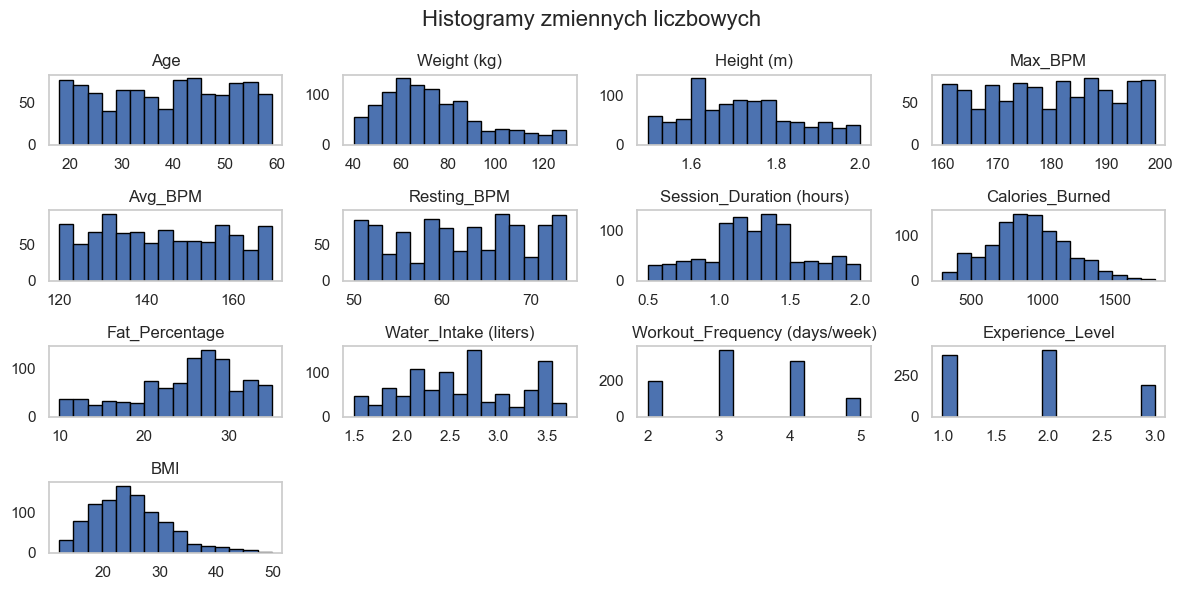

In [55]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

numeric_df.hist(bins=15, edgecolor='black', grid=False)
plt.suptitle("Histogramy zmiennych liczbowych", fontsize=16)
plt.tight_layout()
plt.show()


Histogram przedstawia rozkład wartości w zbiorze danych. Podstawowe informacje to:

- **Wysokość słupków**: liczba obserwacji w danym przedziale.
- **Rozkład**: czy dane są symetryczne, skośne, czy przypominają rozkład normalny.

In [56]:
import plotly.express as px
for col in numeric_df.columns:
    fig = px.box(df, y=col, points="all", title=f"Boxplot: {col}")
    fig.show()

Boxplot pokazuje rozkład danych w sposób wizualny, umożliwiając ocenę:

- **Mediana** (środkowa linia w prostokącie): środkowa wartość zbioru danych.
- **Kwartyle** (górna i dolna krawędź prostokąta): dzielą dane na ćwiartki.
- **Wąsy**: reprezentują rozstęp pomiędzy 1. i 3. kwartylem (IQR), czyli rozstęp międzykwartylowy.
- **Wartości odstające**: punkty znajdujące się poza wąsami, które mogą być uznane za outliery.

In [57]:
fig = px.scatter(df, x="Session_Duration (hours)", y="Calories_Burned", color="Gender",
                 title="Session Duration vs Calories Burned")
fig.show()

fig = px.scatter(df, x="Weight (kg)", y="BMI", color="Gender",
                 title="Weight vs BMI")
fig.show()

fig = px.scatter(df, x="Height (m)", y="Weight (kg)", color="Gender",
                 title="Height vs Weight")
fig.show()

Scatterplot ilustruje związek między dwiema zmiennymi ilościowymi, co umożliwia:
- **Korelację**: kierunek zależności (dodatnia/ujemna).
- **Wartości odstające**: punkty odstające od głównej chmury punktów.

In [29]:
import plotly.graph_objects as go


numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()

fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    text=corr.values,
    hovertemplate='Korelacja: %{z}<extra></extra>'
))

fig.update_layout(title="Macierz korelacji")
fig.show()


### Macierz korelacji

Korelacja - statystyczna miara tego, jak bardzo dwie zmienne są ze sobą powiązane

Macierz korelacji - tabela, która pokazuje korelacje między wszystkimi parami zmiennych numerycznych w zbiorze danych.

Interpretacja:

1 - pełna dodatnia korelacja (zmienne rosną razem)

0 - brak związku liniowego

-1 - pełna ujemna korelacja (jedna rośnie, druga maleje)


 ### Analiza zmiennych kategorycznych

In [58]:
categorical_cols = ['Gender', 'Workout_Type', 'Experience_Level']

for col in categorical_cols:
    print(f"Tabela częstości dla {col}:")
    print(df[col].value_counts())
    print("\n")

Tabela częstości dla Gender:
Gender
Male      511
Female    462
Name: count, dtype: int64


Tabela częstości dla Workout_Type:
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


Tabela częstości dla Experience_Level:
Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64




In [59]:
fig = px.pie(df, names="Gender", title="Udział procentowy: Gender")
fig.show()

fig = px.pie(df, names="Workout_Type", title="Udział procentowy: Workout Type")
fig.show()

fig = px.pie(df, names="Experience_Level", title="Udział procentowy: Experience Level")
fig.show()


Pie chart to wizualizacja rozkładu procentowego kategorii. Pokazuje:
- **Udział procentowy**: każda sekcja koła reprezentuje procentowy udział danej kategorii

### Relacje między zmiennymi

In [60]:
fig = px.violin(df, x="Workout_Type", y="Calories_Burned", box=True, points="all",
                title="Rozkład Calories Burned w różnych Workout Types")
fig.show()

fig = px.violin(df, x="Gender", y="BMI", box=True, points="all", title="Rozkład BMI według płci")
fig.show()

Violin plot łączy cechy boxplotu z gęstościami rozkładów. Wskazuje na:
- **Gęstość rozkładu** (kształt wykresu): pokazuje, gdzie występuje koncentracja danych.
- **Kwartyle**: przedstawiane w formie linii, podobnie jak w boxplot.
- **Wartości odstające**: mogą być widoczne jako punkty poza wykresem

In [61]:
import plotly.express as px

fig = px.violin(df, x="Workout_Type", y="Calories_Burned", color="Gender",
                box=True, points="all", facet_col="Gender", title="Rozkład Calories Burned w Workout Types według płci")
fig.show()


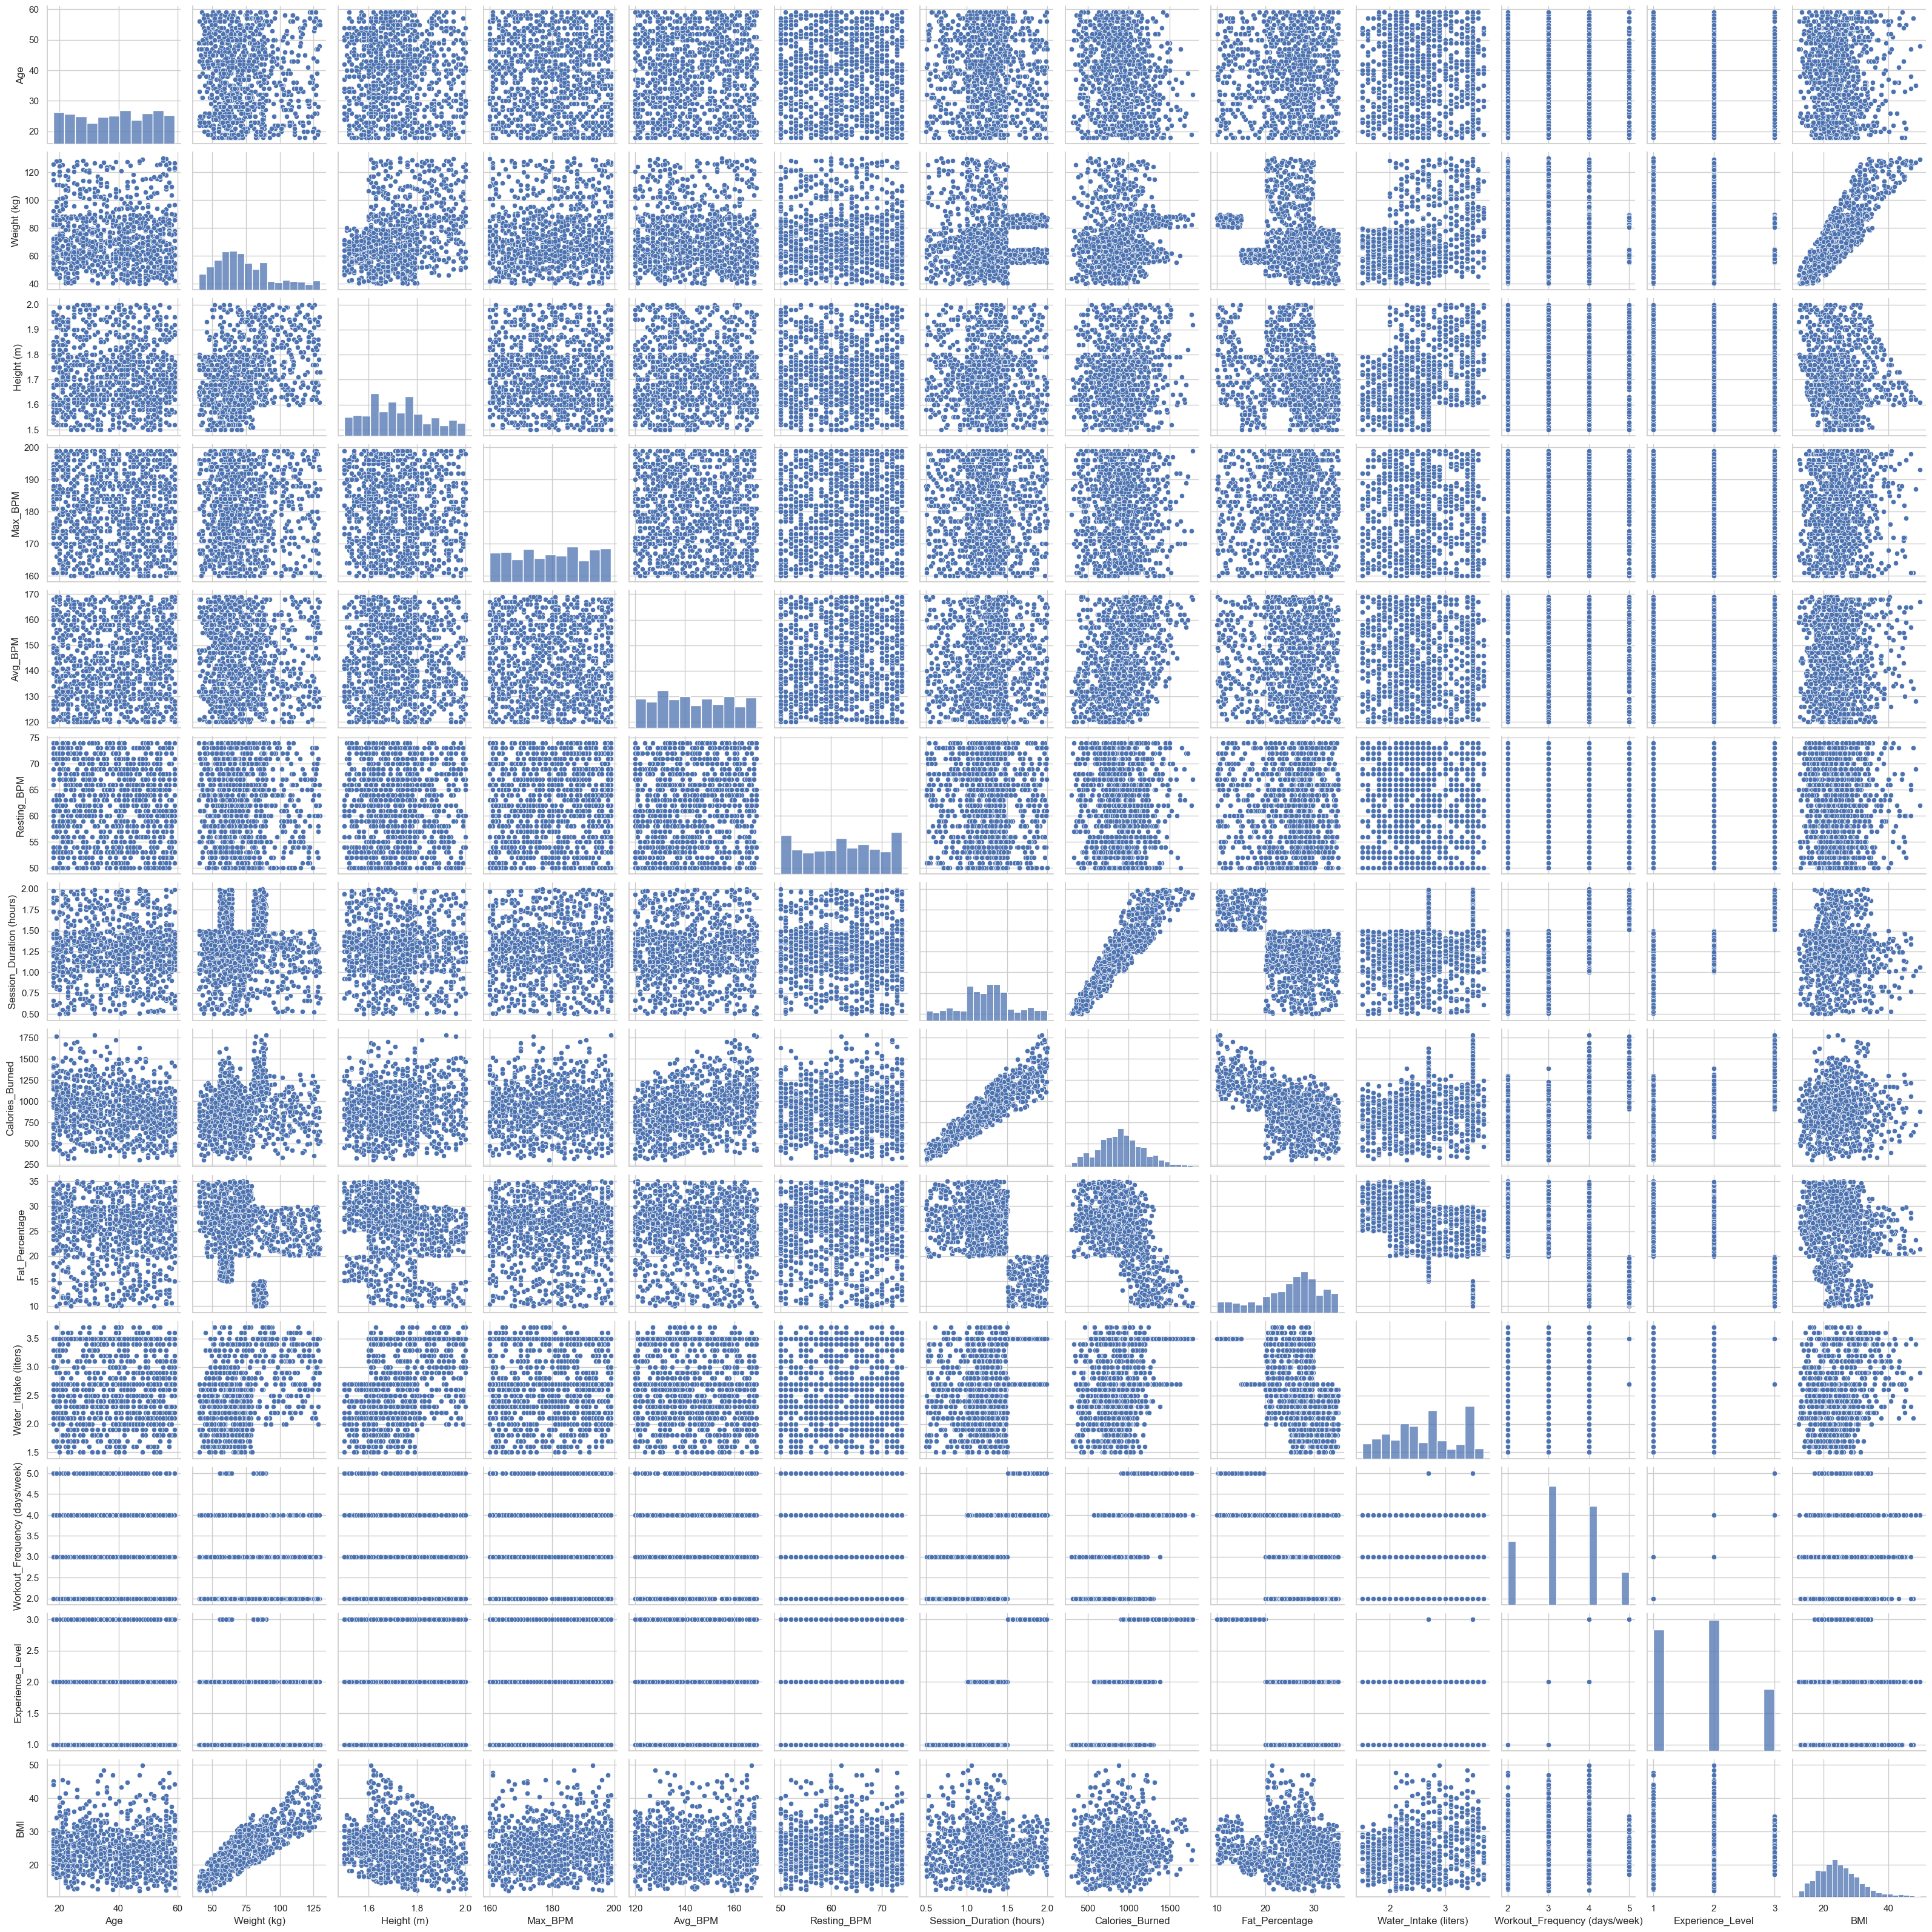

In [62]:
import seaborn as sns

sns.pairplot(numeric_df)


pairplot to macierz wykresów rozrzutu (scatter plots) pokazujących wszystkie możliwe pary zmiennych liczbowych w zbiorze danych.